In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image


import dense_correspondence_manipulation.utils.utils as utils
utils.add_dense_correspondence_to_python_path()

import dense_correspondence
from dense_correspondence.evaluation.evaluation import *
import dense_correspondence.correspondence_tools.correspondence_plotter as correspondence_plotter
from dense_correspondence.dataset.dense_correspondence_dataset_masked import ImageType
from dense_correspondence.network.dense_correspondence_network import DenseCorrespondenceNetwork
import dense_correspondence.evaluation.plotting as dc_plotting
%matplotlib inline 
utils.set_cuda_visible_devices([0])

config_filename = os.path.join(utils.getDenseCorrespondenceSourceDir(), 'config', 
                               'dense_correspondence', 'evaluation', 'evaluation.yaml')
config = utils.getDictFromYamlFilename(config_filename)
dce = DenseCorrespondenceEvaluation(config)
DCE = DenseCorrespondenceEvaluation
dcn = dce.load_network_from_config("elephant_rgb_3")
dataset = dcn.load_training_dataset()

def run_dcn_on_image(dcn, dataset, img):
    """
    Run DCN on PIL img. use of dataset is a hack, just need to ge the descriptor image stats 
    which actually just uses a constant for std and mean. 
    """
    rgb_a_tensor = dataset.rgb_image_to_tensor(img)
    res_a = dcn.forward_single_image_tensor(rgb_a_tensor).data.cpu().numpy()
    descriptor_image_stats = dcn.descriptor_image_stats
    res_a_norm = dc_plotting.normalize_descriptor(res_a, descriptor_image_stats["mask_image"])
    return res_a_norm


setting CUDA_VISIBLE_DEVICES =  0,


/home/davidtseng/pytorch-dense-correspondence/env/local/lib/python2.7/site-packages/torch/nn/modules/module.py:482: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  own_state[name].copy_(param)


Using SpartanDataset:
   - in train mode
   - number of scenes 1
   - total images:     3730


In [2]:
heap_img = Image.open("/nfs/diskstation/dmwang/labeled_wisdom_real/phoxi/depth_ims/image_000000.png").convert('RGB')
heap = np.array(heap_img)

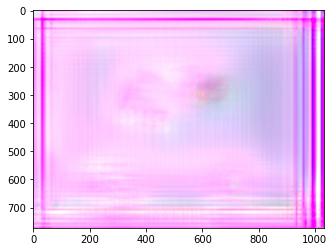

In [4]:
heap_descriptors = run_dcn_on_image(dcn, dataset, heap_img)
plt.imshow(heap_descriptors)